In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Flatten,Dropout,LSTM,SimpleRNN,Input,GRU,Concatenate,BatchNormalization
from keras.models import Sequential,Model


In [116]:
df=pd.read_csv("/kaggle/input/robot-kinematics-dataset/robot_inverse_kinematics_dataset.csv")

In [117]:
df.tail()

,q1,q2,q3,q4,q5,q6,x,y,z
14995,0.314,-0.534,1.76,1.97,-0.699,3.87,-0.1130,-0.12800,0.257
14996,2.450,1.360,1.55,2.78,-0.321,5.31,0.0633,-0.03160,0.450
14997,2.620,1.410,1.56,2.54,1.060,5.87,0.1310,-0.16000,0.362
14998,-1.890,1.850,1.51,1.09,0.697,4.07,0.0829,-0.01600,0.441
14999,2.680,-1.790,1.79,2.62,1.590,2.64,-0.1570,-0.00369,0.254


In [118]:
df.describe()

,q1,q2,q3,q4,q5,q6,x,y,z
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.000855,-0.009156,1.572407,0.018612,-0.009395,3.143289,-0.005186,-0.000697,0.257294
std,1.655036,1.110602,0.201659,1.619865,1.211110,1.810345,0.102542,0.105618,0.112316
min,-2.880000,-1.920000,1.220000,-2.790000,-2.090000,0.000441,-0.290000,-0.298000,-0.020800
25%,-1.430000,-0.979250,1.400000,-1.380000,-1.060000,1.580000,-0.086900,-0.083700,0.165000
50%,0.006850,-0.010200,1.570000,0.038650,-0.021100,3.150000,-0.006940,-0.000201,0.256000
75%,1.420000,0.957000,1.750000,1.410000,1.040000,4.710000,0.075500,0.081900,0.343000
max,2.880000,1.920000,1.920000,2.790000,2.090000,6.280000,0.292000,0.297000,0.490000


In [119]:
df.isnull().sum()

q1    0
q2    0
q3    0
q4    0
q5    0
q6    0
x     0
y     0
z     0
dtype: int64

In [120]:
df.dtypes





q1    float64
q2    float64
q3    float64
q4    float64
q5    float64
q6    float64
x     float64
y     float64
z     float64
dtype: object

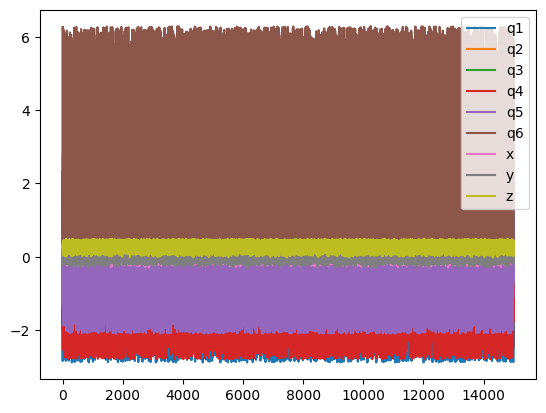

In [121]:
df.plot()
plt.show()

In [122]:
df.corr()

,q1,q2,q3,q4,q5,q6,x,y,z
q1,1.000000,0.016977,-0.002859,-0.003155,0.010976,-0.012044,0.009375,-0.247352,0.020598
q2,0.016977,1.000000,-0.012649,-0.008667,-0.009506,0.002499,-0.052216,-0.014787,0.568506
q3,-0.002859,-0.012649,1.000000,-0.010051,-0.009091,0.013897,-0.001459,0.012059,0.308877
q4,-0.003155,-0.008667,-0.010051,1.000000,0.004834,0.004934,0.005566,-0.008898,-0.010112
q5,0.010976,-0.009506,-0.009091,0.004834,1.000000,0.000356,0.019316,0.011501,0.051358
q6,-0.012044,0.002499,0.013897,0.004934,0.000356,1.000000,0.014647,-0.011294,0.005147
x,0.009375,-0.052216,-0.001459,0.005566,0.019316,0.014647,1.000000,-0.001277,-0.008185
y,-0.247352,-0.014787,0.012059,-0.008898,0.011501,-0.011294,-0.001277,1.000000,-0.012209
z,0.020598,0.568506,0.308877,-0.010112,0.051358,0.005147,-0.008185,-0.012209,1.000000


In [123]:
X = df.iloc[:, :8]
Y=df.iloc[:,8]

In [124]:
X.shape


(15000, 8)

In [125]:
Y.shape

(15000,)

In [126]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)

In [127]:
import numpy as np

# Assuming X_train is your DataFrame
X_train_array = X_train.values  # Convert DataFrame to NumPy array
Y_train_array=Y_train.values
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], 1, X_train_array.shape[1])
Y_train_reshaped=Y_train_array.reshape(Y_train_array.shape[0],1)

In [128]:
Y_train_reshaped.shape

(11250, 1)

In [129]:
X_train_reshaped.shape

(11250, 1, 8)

In [130]:
X_train.shape

(11250, 8)

In [131]:
models1 =Sequential([
    Input(shape=(11250,8)),
    LSTM(64,activation="relu"),
    Dense(64,activation="relu"),
#     SimpleRNN(64,activation="relu"),
    Dense(64,activation="relu"),
#     GRU(62,activation="relu"),
    Dropout(0.5),
    Dense(32,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [132]:
models2 =Sequential([
    Input(shape=(11250,8)),
    SimpleRNN(64,activation="relu"),
#     LSTM(64,activation="relu"),
    Dense(64,activation="relu"),
    
    Dense(64,activation="relu"),
#     GRU(62,activation="relu"),
    Dropout(0.5),
    Dense(32,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [133]:
models3 =Sequential([
    Input(shape=(11250,8)),
    GRU(62,activation="relu"),
#     LSTM(64,activation="relu"),
    Dense(64,activation="relu"),
#     SimpleRNN(64,activation="relu"),
    Dense(64,activation="relu"),
   
    Dropout(0.5),
    Dense(32,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [164]:
models4 =Sequential([
    Input(shape=(11250,8)),
#     GRU(62,activation="relu"),
#     LSTM(64,activation="relu"),
    Dense(64,activation="relu"),
    BatchNormalization(),
#     SimpleRNN(64,activation="relu"),
    Dense(64,activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32,activation="relu"),
    BatchNormalization(),
    Dense(1,activation="sigmoid")
])

In [135]:
# X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
model_concat=Concatenate([models1,models2,models3])

In [136]:
print(type(model_concat))


<class 'keras.src.layers.merging.concatenate.Concatenate'>


In [137]:
# import numpy as np

# # Assuming X_train is your input data
# output_tensor = model_concat.predict(X_train)
# print(output_tensor.shape)


In [138]:
# input12=Input(shape=(11250,8))

In [139]:
# model_model=Model(inputs=input12,outputs=model_concat)

In [140]:
# model_model.fit(model = models.fit(X_train_reshaped,Y_train_reshaped,epochs=100,batch_size=32,verbose=1,validation_data=(X_new_test.reshape(X_new_test.shape[0],1,X_new_test.shape[1]),Y_test)))

In [166]:
models1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
models2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
models3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
models4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [142]:
X_new_test=X_test.values
X_new_test.reshape(X_new_test.shape[0],1,X_new_test.shape[1])

array([[[ 1.59e+00, -1.11e+00,  1.47e+00, ...,  3.12e+00, -7.14e-02,
          8.85e-04]],

       [[-3.34e-01, -1.25e+00,  1.37e+00, ...,  5.03e+00,  9.68e-02,
         -3.33e-02]],

       [[ 1.09e+00,  4.15e-01,  1.31e+00, ...,  6.23e+00, -1.17e-01,
         -1.70e-01]],

       ...,

       [[-2.48e+00,  1.25e-01,  1.30e+00, ...,  3.33e-01,  9.45e-02,
          1.31e-01]],

       [[ 2.73e+00,  2.84e-01,  1.45e+00, ...,  4.53e+00, -5.00e-02,
         -1.03e-01]],

       [[ 1.92e+00, -4.57e-01,  1.90e+00, ...,  4.97e+00, -1.81e-02,
         -1.70e-01]]])

In [ ]:
model1 = models1.fit(X_train_reshaped,Y_train_reshaped,epochs=100,batch_size=32,verbose=1,validation_data=(X_new_test.reshape(X_new_test.shape[0],1,X_new_test.shape[1]),Y_test))
model2 = models2.fit(X_train_reshaped,Y_train_reshaped,epochs=100,batch_size=32,verbose=1,validation_data=(X_new_test.reshape(X_new_test.shape[0],1,X_new_test.shape[1]),Y_test))
model3 = models3.fit(X_train_reshaped,Y_train_reshaped,epochs=100,batch_size=32,verbose=1,validation_data=(X_new_test.reshape(X_new_test.shape[0],1,X_new_test.shape[1]),Y_test))
# model4 = models3.fit(X_train,Y_train,epochs=100,batch_size=32,verbose=1,validation_data=(X_test,Y_test))

In [ ]:
model4 = models4.fit(X_train_reshaped,Y_train_reshaped,epochs=100,batch_size=32,verbose=1,validation_data=(X_new_test.reshape(X_new_test.shape[0],1,X_new_test.shape[1]),Y_test))

In [168]:
loss1=model1.history['loss']
val_loss1=model1.history['val_loss']
val_accuracy1=model1.history['val_accuracy']
loss2=model2.history['loss']
val_loss2=model2.history['val_loss']
val_accuracy2=model2.history['val_accuracy']
loss3=model3.history['loss']
val_loss3=model3.history['val_loss']
val_accuracy3=model3.history['val_accuracy']
loss4=model4.history['loss']
val_loss4=model4.history['val_loss']
val_accuracy4=model4.history['val_accuracy']

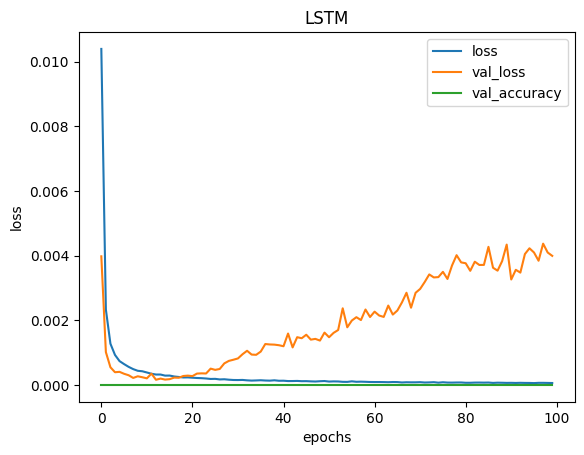

In [176]:
plt.plot(loss1,label="loss")
plt.plot(val_loss1,label="val_loss")
plt.plot(val_accuracy1,label="val_accuracy")
plt.xlabel("epochs")
plt.title("LSTM")
plt.ylabel("loss")
plt.legend()
plt.show()

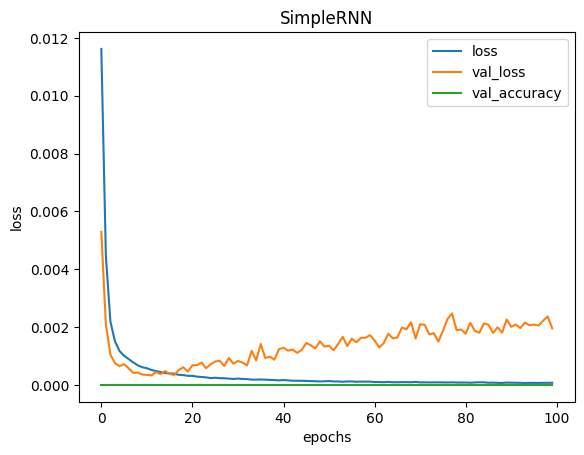

In [175]:
plt.plot(loss2,label="loss")
plt.plot(val_loss2,label="val_loss")
plt.plot(val_accuracy2,label="val_accuracy")
plt.xlabel("epochs")
plt.title("SimpleRNN")
plt.ylabel("loss")
plt.legend()
plt.show()

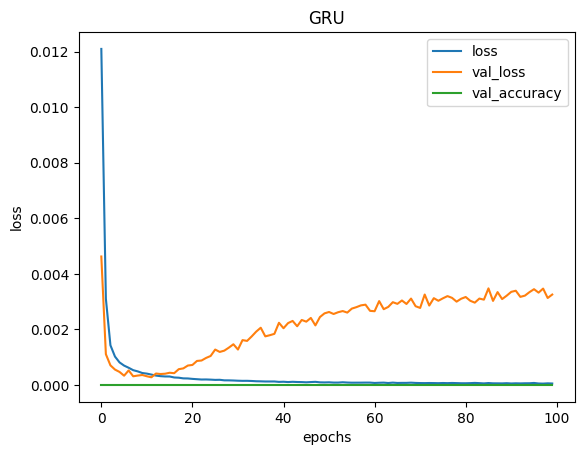

In [174]:
plt.plot(loss3,label="loss")
plt.plot(val_loss3,label="val_loss")
plt.plot(val_accuracy3,label="val_accuracy")
plt.xlabel("epochs")
plt.title("GRU")
plt.ylabel("loss")
plt.legend()
plt.show()

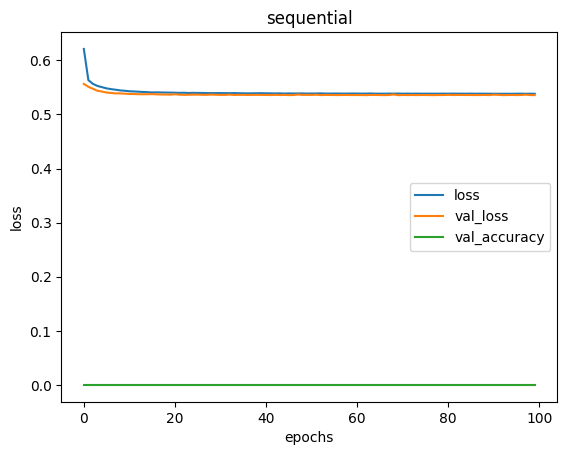

In [173]:
plt.plot(loss4,label="loss")
plt.plot(val_loss4,label="val_loss")
plt.plot(val_accuracy4,label="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("sequential")
plt.legend()
plt.show()